### Лабораторная работа №1 "Генетические алгоритмы"
#### Задание:
Разработка программы, которая осуществляет поиск кратчайшего пути для информационного пакета (сообщения) в компьютерной сети с помощью генетических алгоритмов.

In [1]:
# Импорт необходимых инструментов и библиотек
import random
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
# Задаем основные параметры для ГА
generations = 1000
population_size = 100
chromosome_bodyoncetoldme = 52 # длина хромосомы
selection_count = 50 # сколько особей выбирается в селекции
mutation_normal = 0.25 # шанс мутации, от 0 до 1
log = False # отображение данных после каждой операции

In [3]:
# Получение координат точек на карте Берлина
def parse_tsp_file(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'(\d+) (\d+\.\d+) (\d+\.\d+)', line)
            if m:
                temp = m.groups()[1:]
                result.append((float(temp[0]), float(temp[1])))
    return result

locations = parse_tsp_file("./files/berlin_52_tsp.txt")

In [4]:
# Получение последовательности оптимального пути
def read_optimal(filename):
    result = []
    with open(filename) as f:
        for line in f:
            m = re.match(r'^\d+$', line.rstrip())
            if m:
                result.append(int(m.group()))

    return result

optimal_tour = read_optimal("./files/berlin_52_optimal.txt")

In [5]:
# Функция приспособленности
# Подсчет длинны маршрута по координатам
def fitness_function(chromosome):
    result = 0
    for i in range(0, len(chromosome)):
        point_a = locations[chromosome[i] - 1]
        if(i < len(locations) - 1):
            point_b = locations[chromosome[i + 1] - 1]
        elif(i == len(locations) - 1):
            point_b = locations[chromosome[0] - 1]
        result += math.sqrt((point_a[0] - point_b[0])**2 + (point_a[1] - point_b[1])**2)
    return result

print(fitness_function(optimal_tour))

7544.365901904087


In [6]:
# Генерация популяции
def generate_population(population):
    result = []
    for i in range(population):
        temp = optimal_tour[1:len(optimal_tour) - 1]
        random.shuffle(temp)
        temp.insert(0, optimal_tour[0])
        temp.append(optimal_tour[len(optimal_tour) - 1])
        result.append(temp)
    return result

print(generate_population(3))

[[1, 33, 4, 15, 39, 27, 36, 26, 6, 18, 7, 14, 48, 13, 5, 44, 21, 42, 23, 32, 12, 25, 29, 20, 49, 35, 31, 37, 16, 43, 41, 17, 28, 8, 38, 11, 51, 45, 24, 2, 3, 52, 47, 50, 19, 10, 34, 40, 30, 46, 9, 22], [1, 15, 18, 26, 38, 50, 27, 7, 34, 31, 47, 24, 33, 45, 12, 19, 11, 32, 44, 13, 16, 2, 37, 43, 29, 3, 20, 8, 9, 42, 25, 14, 23, 46, 36, 40, 52, 10, 39, 49, 21, 41, 28, 5, 6, 17, 35, 51, 30, 4, 48, 22], [1, 25, 2, 21, 51, 3, 26, 33, 52, 41, 9, 32, 42, 30, 24, 38, 40, 34, 50, 44, 6, 39, 15, 31, 27, 5, 37, 29, 16, 7, 47, 36, 45, 14, 11, 35, 46, 4, 19, 20, 12, 43, 17, 28, 8, 49, 23, 48, 10, 18, 13, 22]]


In [7]:
# Вывод данных
def print_population(data):
    data_frame = pd.DataFrame(data)
    print(data_frame)

# Лучший маршрут в популяции
def population_best_result(data):
    way_duration = 999999
    way_best = []
    for item in data:
        current_duration = fitness_function(item)
        if(current_duration < way_duration):
            way_duration = current_duration
            way_best = item

    return (way_duration, way_best)

# Худший маршрут в популяции
def population_max_result(data):
    way_durations = []
    for item in data:
        way_durations.append((fitness_function(item), item))
    way_max_duration = sorted(way_durations, key=itemgetter(0), reverse=True)[0]

    return (way_max_duration)

# Средняя длинна маршрута в популяции
def population_average_result(data):
    way_durations = []
    for item in data:
        way_durations.append((fitness_function(item)))
    way_average_duration = np.mean(way_durations)

    return way_average_duration


populations_array = generate_population(3)

print(population_best_result(populations_array))
print(population_max_result(populations_array))
print(population_average_result(populations_array))

(28217.212703172474, [1, 29, 25, 18, 40, 42, 35, 46, 47, 7, 32, 36, 45, 17, 50, 3, 24, 51, 19, 5, 41, 23, 14, 20, 15, 11, 39, 9, 30, 49, 2, 43, 38, 13, 52, 27, 37, 8, 6, 16, 48, 12, 26, 28, 10, 21, 34, 31, 33, 4, 44, 22])
(30973.154705478468, [1, 12, 6, 14, 25, 9, 23, 46, 40, 17, 33, 50, 30, 31, 35, 8, 5, 48, 29, 36, 13, 39, 18, 10, 26, 11, 47, 20, 28, 3, 32, 38, 27, 43, 41, 44, 24, 45, 7, 51, 15, 2, 37, 16, 4, 21, 34, 19, 52, 42, 49, 22])
29510.495194261166


In [8]:
# Селекция методом рулетки
def roulette_selection(data, selection_count):
    pool = []
    sectors = []
    wheel = []
    f_sum = 0

    for chromosome in data:
        f = 1 / (1 + fitness_function(chromosome))
        f_sum += f
    for chromosome in data:
        f = 1 / (1 + fitness_function(chromosome))
        v = f / f_sum * 100
        sectors.append((v, chromosome))
    # sectors=sorted(sectors, key=itemgetter(0))
    point = 0
    for i in range(0, len(sectors) - 1):
        wheel.append((sectors[i][1], (point, point + sectors[i][0])))
        point += sectors[i][0]

        if(i == len(sectors) - 2): 
            wheel.append((sectors[i][1], (point, 100)))
    # print(wheel)
    for i in range(selection_count):
        choice = random.randint(0,100)
        for j in wheel:
            # Выборка особей без возможности дублирования
            # if((choice>=j[1][0]) and (choice<=j[1][1]) and (j[0] not in pool)):
            # Выборка особей с возможностью дублирования
            if((choice >= j[1][0]) and (choice <= j[1][1])):
                pool.append(j[0])
                break

    return pool

print(roulette_selection(generate_population(10), 5))

[[1, 17, 41, 21, 52, 39, 43, 42, 10, 47, 51, 15, 46, 6, 45, 8, 14, 20, 7, 28, 37, 33, 40, 12, 48, 49, 25, 31, 35, 24, 18, 30, 4, 23, 3, 26, 9, 29, 11, 50, 16, 44, 13, 32, 5, 19, 36, 2, 34, 38, 27, 22], [1, 37, 36, 4, 29, 49, 47, 26, 14, 34, 31, 41, 21, 2, 27, 13, 43, 5, 24, 40, 3, 33, 19, 50, 25, 32, 30, 16, 8, 51, 44, 15, 20, 46, 10, 18, 17, 23, 45, 7, 35, 42, 12, 6, 38, 52, 39, 9, 48, 28, 11, 22], [1, 36, 39, 34, 17, 43, 4, 11, 37, 28, 33, 51, 9, 48, 46, 23, 3, 32, 21, 7, 47, 29, 12, 27, 6, 42, 40, 5, 13, 30, 16, 52, 44, 14, 31, 20, 38, 15, 45, 2, 49, 25, 8, 24, 50, 35, 26, 10, 19, 18, 41, 22], [1, 41, 21, 49, 48, 12, 26, 28, 47, 5, 15, 14, 42, 52, 50, 17, 39, 7, 36, 33, 37, 34, 44, 43, 19, 31, 40, 18, 27, 29, 23, 8, 46, 20, 32, 2, 3, 6, 16, 30, 9, 4, 45, 13, 24, 51, 10, 25, 11, 35, 38, 22], [1, 6, 21, 14, 10, 34, 39, 9, 40, 42, 5, 29, 8, 26, 7, 47, 48, 2, 28, 46, 18, 4, 25, 13, 45, 41, 33, 27, 20, 19, 3, 35, 32, 49, 12, 17, 15, 50, 23, 44, 16, 37, 38, 36, 11, 51, 30, 43, 52, 31, 24,

In [9]:
# Ранговая селекция
def rank_selection(data, selection_count):
    pool = []
    adaptation = []
    for chromosome in data:
        adaptation.append((fitness_function(chromosome), chromosome))
    adaptation = sorted(adaptation, key=itemgetter(0))
    for i in range(0, selection_count):
        pool.append(adaptation[i][1])

    return pool

print(rank_selection(generate_population(10), 5))

[[1, 52, 38, 40, 10, 6, 19, 24, 29, 2, 11, 28, 36, 32, 20, 4, 50, 15, 48, 35, 21, 17, 9, 43, 46, 49, 39, 13, 34, 45, 23, 51, 3, 47, 16, 26, 27, 44, 37, 7, 42, 18, 33, 14, 12, 5, 8, 41, 25, 30, 31, 22], [1, 14, 52, 8, 47, 35, 6, 51, 7, 18, 20, 30, 44, 37, 13, 46, 11, 29, 41, 27, 42, 21, 43, 39, 17, 31, 36, 45, 10, 16, 12, 48, 28, 19, 50, 5, 40, 15, 2, 23, 38, 49, 3, 25, 24, 9, 32, 4, 33, 34, 26, 22], [1, 10, 43, 3, 23, 19, 30, 32, 45, 7, 24, 36, 46, 26, 48, 39, 33, 34, 16, 6, 9, 17, 20, 8, 44, 49, 15, 28, 25, 31, 27, 14, 5, 2, 4, 35, 52, 38, 42, 40, 18, 51, 21, 47, 29, 41, 11, 13, 12, 50, 37, 22], [1, 40, 17, 33, 37, 51, 44, 19, 25, 32, 7, 6, 26, 29, 50, 12, 46, 42, 47, 52, 36, 21, 41, 15, 38, 27, 24, 31, 5, 30, 34, 45, 43, 20, 9, 28, 13, 18, 11, 48, 4, 14, 10, 39, 49, 35, 23, 3, 8, 16, 2, 22], [1, 21, 33, 29, 35, 46, 28, 49, 7, 52, 38, 15, 48, 32, 24, 16, 30, 50, 13, 36, 17, 19, 5, 8, 18, 41, 47, 44, 27, 37, 43, 9, 42, 2, 4, 20, 12, 14, 34, 26, 3, 6, 23, 10, 45, 39, 40, 51, 25, 31, 11,

In [11]:
# Перестановочное скрещивание
# Принимает 2 массива-родителя, возвращает 2 массива-потомка
def permutation_crossover(parent_1, parent_2, chromo_length):
    # Уменьшаем показатель, для сохранения начальной и конечной точки массивов
    chromo_length -= 2
    parent_1_start = parent_1[0]
    parent_2_start = parent_2[0]
    parent_1_end = parent_1[-1]
    parent_2_end = parent_2[-1]

    parent_1 = parent_1[1:len(parent_1)-1]
    parent_2 = parent_2[1:len(parent_2)-1]

    # Расчет двух точек для скрещивания
    point_1 = random.randint(1, chromo_length // 2 - 1)
    point_2 = random.randint(point_1 + 1, chromo_length - 1)
    # Элементы между точками скрещивания
    middle = parent_1[point_1:point_2 + 1]

    temp_elements = []
    for i in parent_2:
        if not (i in middle):  temp_elements.append(i)

    child_1 = []

    for i in range(0, chromo_length - 1):
        if(i < point_1): child_1.append(temp_elements.pop(0))
        elif(i == point_1): child_1 += middle
        elif(i == point_2): child_1.append(temp_elements.pop(0))
        elif(i > point_2) and (len(temp_elements) > 0): child_1.append(temp_elements.pop(0))
        elif(i > point_2) and (len(temp_elements) == 0): child_1.append(parent_2[i])

    # Элементы между точками скрещивания
    middle = parent_2[point_1:point_2 + 1]
    temp_elements = []
    for i in parent_1:
        if not (i in middle): temp_elements.append(i)

    child_2 = []

    for i in range(0, chromo_length - 1):
        if(i < point_1): child_2.append(temp_elements.pop(0))
        elif(i == point_1): child_2 += middle
        elif(i == point_2): child_2.append(temp_elements.pop(0))
        elif(i > point_2) and (len(temp_elements) > 0): child_2.append(temp_elements.pop(0))
        elif(i > point_2) and (len(temp_elements) == 0): child_2.append(parent_1[i])

    child_1.insert(0, parent_1_start)
    child_1.append(parent_1_end)
    child_2.insert(0, parent_2_start)
    child_2.append(parent_2_end)
    return child_1, child_2

print(permutation_crossover([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 10))

([1, 3, 2, 4, 5, 6, 7, 8, 9, 10], [10, 8, 9, 7, 6, 5, 4, 3, 2, 1])


In [12]:
# Одноточечное скрещивание
# Принимает 2 массива-родителя, возвращает 2 массива-потомка
def two_point_crossover(parent_1, parent_2, chromo_length):
    # Уменьшаем показатель, для сохранения начальной и конечной точки массивов
    chromo_length -= 2
    parent_1_start = parent_1[0]
    parent_2_start = parent_2[0]
    parent_1_end = parent_1[-1]
    parent_2_end = parent_2[-1]

    parent_1 = parent_1[1:len(parent_1)-1]
    parent_2 = parent_2[1:len(parent_2)-1]

    # Расчет двух точек для скрещивания
    point_1 = random.randint(1, chromo_length - 1)

    print(point_1)

    child_1 = parent_1[0:point_1 + 1] + parent_2[point_1 + 1:]
    child_2 = parent_2[0:point_1 + 1] + parent_1[point_1 + 1:]

    # добавляются крайние точки от родителей
    child_1.insert(0, parent_1_start)
    child_1.append(parent_1_end)
    child_2.insert(0, parent_2_start)
    child_2.append(parent_2_end)
    return child_1, child_2

print(two_point_crossover([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [10, 9, 8, 7, 6, 5, 4, 3, 2, 1], 10))

6
([1, 2, 3, 4, 5, 6, 7, 8, 2, 10], [10, 9, 8, 7, 6, 5, 4, 3, 9, 1])


In [13]:
def mutation(chromosome, chrom_length):
    result = chromosome
    mutation_chance = random.random()

    if(mutation_chance <= mutation_normal):
        point_1 = random.randint(2, chrom_length // 2 - 1)
        point_2 = random.randint(point_1 + 1, chrom_length - 2)
        temp = result[point_1:point_2 + 1]
        random.shuffle(temp)

        result[point_1:point_2 + 1] = temp

    return result

mutation([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 10)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
average_results = []
max_results = []
min_results = []
best = []

elite_size = 10

if(log):
    current_population = generate_population(population_size)
    print("первая популяция создана:")
    print_population(current_population)
    print("Лучшее значение приспособленности:")
    print(population_best_result(current_population))

    for generation in range(generations):
        print(f"Поколение {generation + 1}")
        if(elite_size > 0):
            elite = rank_selection(current_population, elite_size)
        current_population = roulette_selection(current_population, selection_count)

        print("Cелекция произведена")
        print("Результат селекции:")
        print_population(current_population)
        print("Лучшее значение приспособленности после селекции:")
        print(population_best_result(current_population))

        for i in range((population_size - selection_count - elite_size) // 2):
            parent_1 = random.randint(0, selection_count - 1)
            parent_2 = random.randint(0, selection_count - 1)
            while(parent_2 == parent_1): parent2 = random.randint(0, selection_count - 1)
            children = permutation_crossover(current_population[parent_1], current_population[parent_2], chromosome_bodyoncetoldme)
            current_population.append(children[0])
            current_population.append(children[1])

        if(elite_size > 0):
            current_population += elite
        if(len(current_population) < population_size):
            current_population.append(generate_population(1)[0])
        print("Скрещивание произведено")
        print("Результат скрещивания:")
        print_population(current_population)
        print("Лучшее значение приспособленности после скрещивания:")
        print(population_best_result(current_population))

        temp = current_population
        for count in range(0, len(current_population) - 1):
            temp[count] = mutation(current_population[count], chromosome_bodyoncetoldme)
        current_population = temp
        print("Мутация произведена")
        print("Результат мутации:")
        print_population(current_population)
        print("Лучшее значение приспособленности после мутации:")

        best_way = population_best_result(current_population)
        print(best_way)

        min_results.append(best_way[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=best_way[1]

        print(f"Конец {generation + 1} поколения")

In [15]:
if(not log):
    current_population = generate_population(population_size)

    for generation in range(generations):
        
        if(elite_size > 0):
            elite = rank_selection(current_population, elite_size)
        current_population = roulette_selection(current_population, selection_count)

        for i in range((population_size - selection_count - elite_size) // 2):
            parent_1 = random.randint(0, selection_count - 1)
            parent_2 = random.randint(0, selection_count - 1)
            while(parent_2 == parent_1): parent_2 = random.randint(0, selection_count - 1)
            children = permutation_crossover(current_population[parent_1], current_population[parent_2], chromosome_bodyoncetoldme)
            current_population.append(children[0])
            current_population.append(children[1])

        temp = current_population
        for count in range(0, len(current_population) - 1):
            temp[count] = mutation(current_population[count], chromosome_bodyoncetoldme)
        current_population = temp

        if(elite_size > 0):
            current_population += elite
        if(len(current_population) < population_size): 
            current_population.append(generate_population(1)[0])

        best_way = population_best_result(current_population)

        min_results.append(best_way[0])
        max_results.append(population_max_result(current_population)[0])
        average_results.append(population_average_result(current_population))
        best=best_way[1]

    print(f"Лучший маршрут в конце {generations} поколения:")
    print(min_results[generations - 1], best)

Лучший маршрут в конце 1000 поколения:
17680.446364795735 [1, 31, 42, 7, 2, 51, 11, 47, 14, 52, 26, 27, 13, 12, 28, 15, 46, 24, 34, 10, 41, 50, 33, 4, 38, 25, 16, 17, 21, 45, 37, 39, 35, 3, 20, 49, 36, 6, 23, 30, 48, 44, 5, 8, 32, 18, 19, 9, 43, 40, 29, 22]


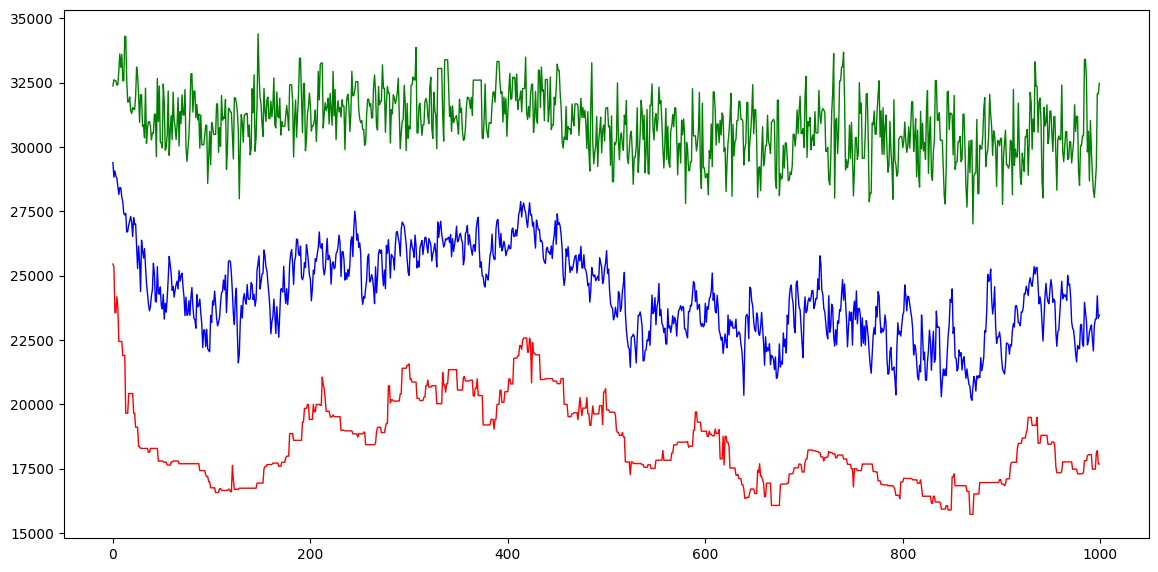

In [18]:
# График приспособленности по поколениям
def draw_progress(average_results, max_results, min_results, gen_count):
    plt.figure(figsize=(14,7), dpi=100)
    x = range(gen_count)
    y_1 = average_results
    y_2 = max_results
    y_3 = min_results
    plt.plot(x, y_1, linewidth=1, color="blue")
    plt.plot(x, y_2, linewidth=1, color="green" )
    plt.plot(x, y_3, linewidth=1, color="red")
    plt.show()

draw_progress(average_results, max_results, min_results, generations)

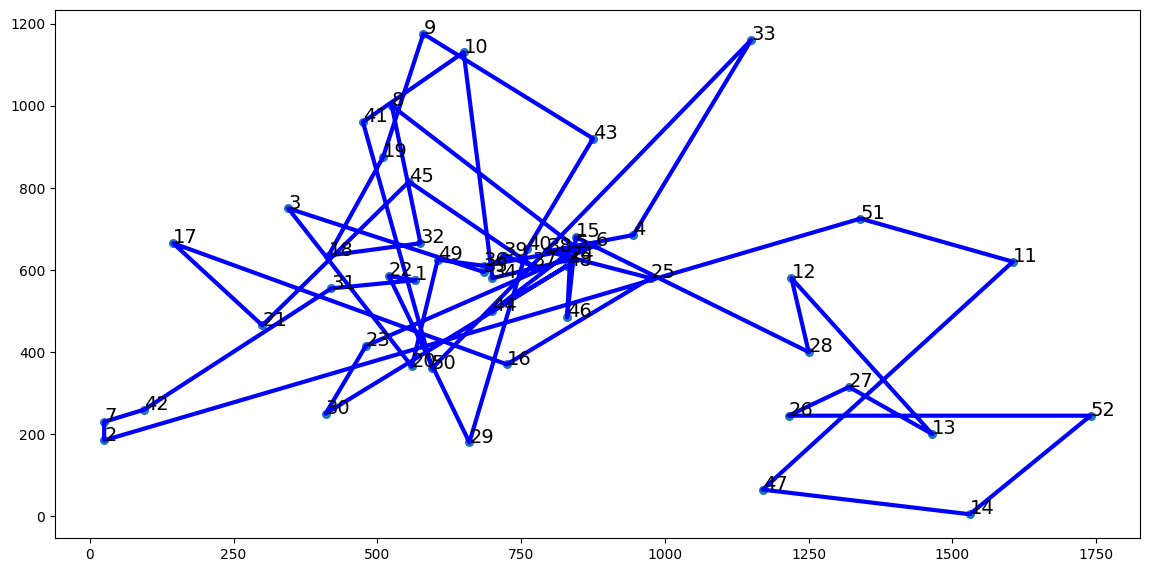

In [22]:
# Граф лучшего маршрута
def draw_best_graph(best_shromo):
    plt.figure(figsize=(14, 7), dpi=100)
    x = [locations[i-1][0] for i in best_shromo]
    x.append(x[0])
    y = [locations[i-1][1] for i in best_shromo]
    y.append(y[0])
    plt.plot(x, y, linewidth=3, color='blue')
    plt.scatter(x, y, s=30)
    for i in best_shromo:
        plt.annotate(i, locations[i-1], size=14)
    plt.show()
draw_best_graph(best)